In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, silhouette_score, jaccard_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [2]:
# Подготовка данных
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Лабы нейронки/data.xlsx")

df = df[["ХСН", "САД", "КСР", "QRS", "HCT", "PLT", "СКФ"]]
df = df.dropna()
df = df.to_numpy()

X = df[:, 1:]
y = df[:, 0]

# Разделение выборки на тестовую и обучающую
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.32, random_state=42)

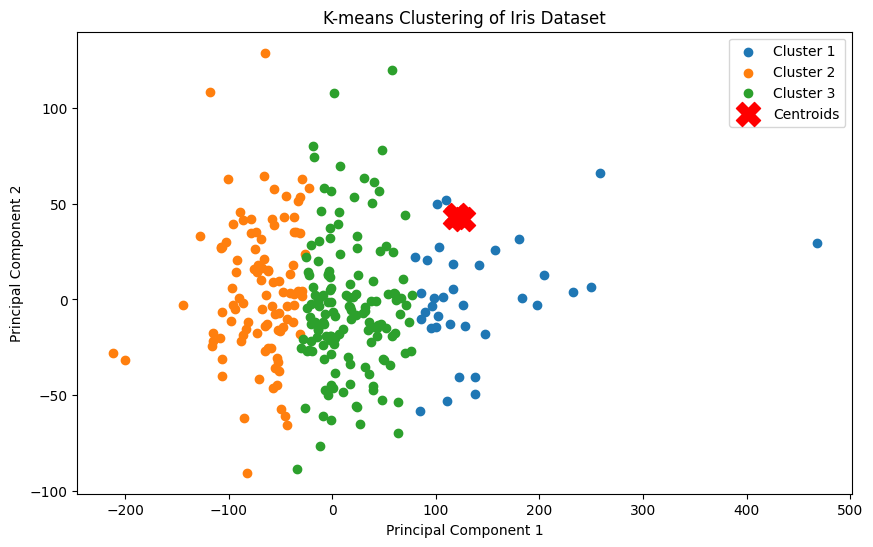

In [3]:
# Применение метода K-средних для кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Применение PCA для уменьшения размерности до 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Построение распределения кластеров на двумерном графике
plt.figure(figsize=(10, 6))
for i in range(3):
    points = X_pca[labels == i]
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [4]:
# Вычисление коэффициента силуэта
silhouette_avg = silhouette_score(X, labels)
print(f'Средний коэффициент силуэта: {silhouette_avg}')

# Вычисление индекса Джаккарда
# Преобразуем метки кластеров и истинные метки в формат, пригодный для jaccard_score
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y)
labels_encoded = label_encoder.fit_transform(labels)

jaccard_index = jaccard_score(y_true_encoded, labels_encoded, average='macro')
print(f'Индекс Джаккарда для каждого кластера: {jaccard_index}')


Средний коэффициент силуэта: 0.2781644565986317
Индекс Джаккарда для каждого кластера: 0.14109541252398394


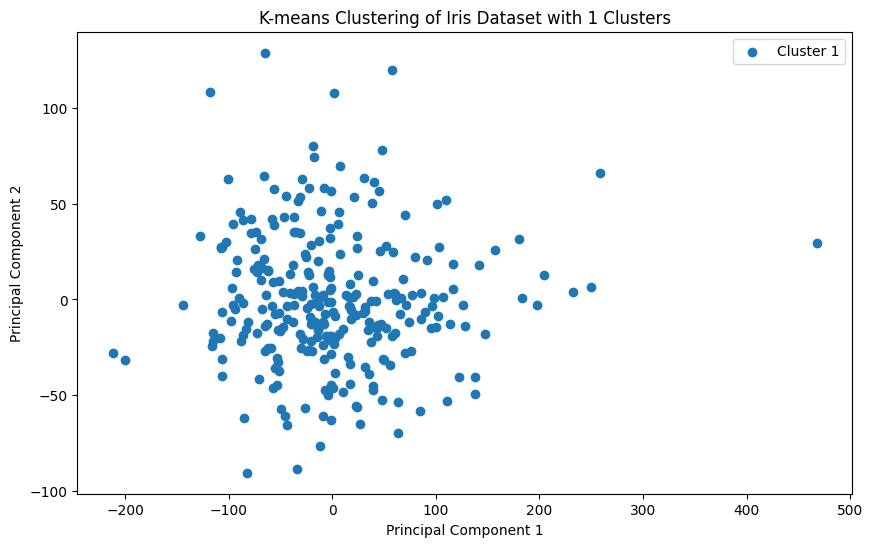

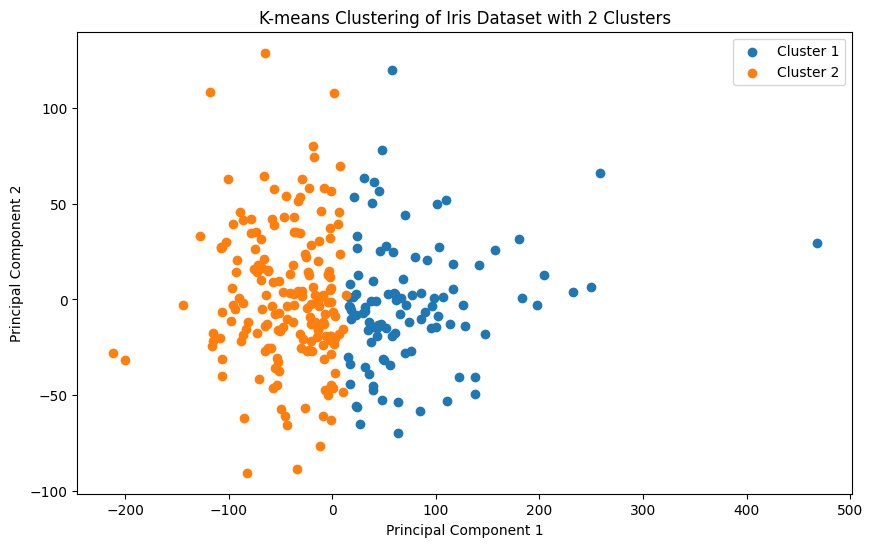

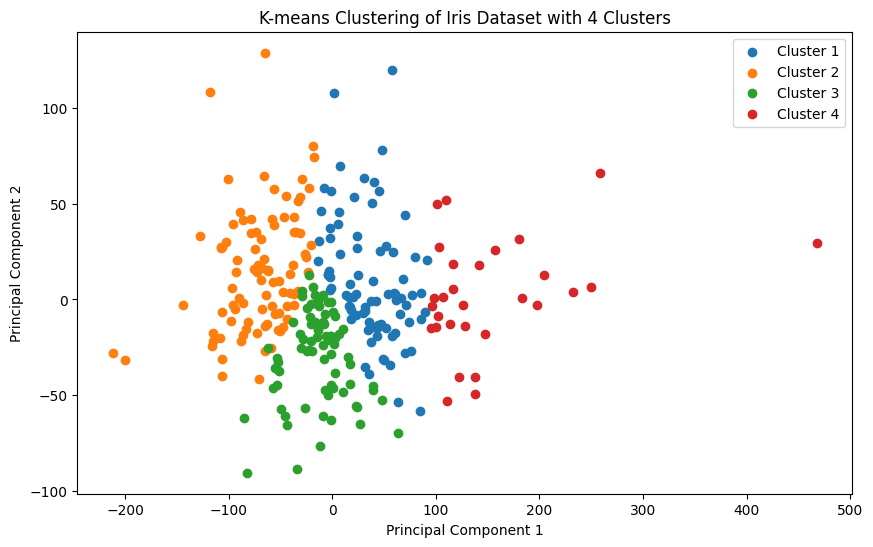

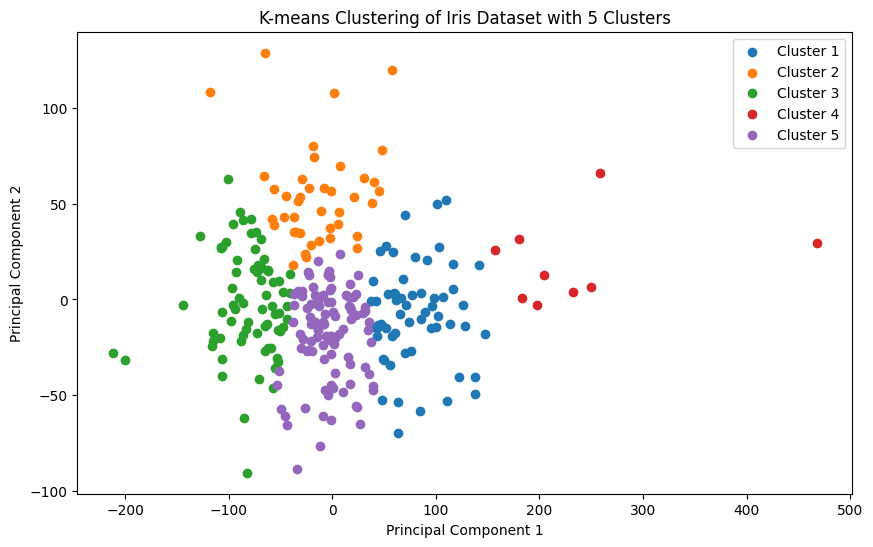

In [11]:
# Функция для кластеризации и визуализации
def plot_clusters(X, n_clusters):
    # Применение метода K-средних для кластеризации
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    # Применение PCA для уменьшения размерности до 2D
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Построение распределения кластеров на двумерном графике
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        points = X_pca[labels == i]
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i+1}')

    plt.title(f'K-means Clustering of Iris Dataset with {n_clusters} Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Кластеризация и визуализация для различных количеств кластеров
for n_clusters in [1, 2, 4, 5]:
    plot_clusters(X, n_clusters)


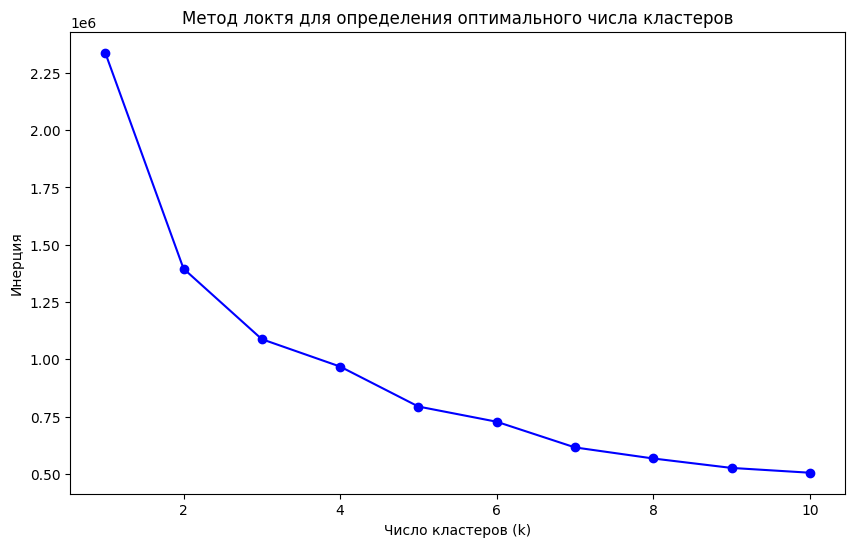

In [6]:
# Определение диапазона значений k
k_range = range(1, 11)

# Вычисление инерции для каждого значения k
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Построение графика метода локтя
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Инерция')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.show()


ROC AUC: 1.0


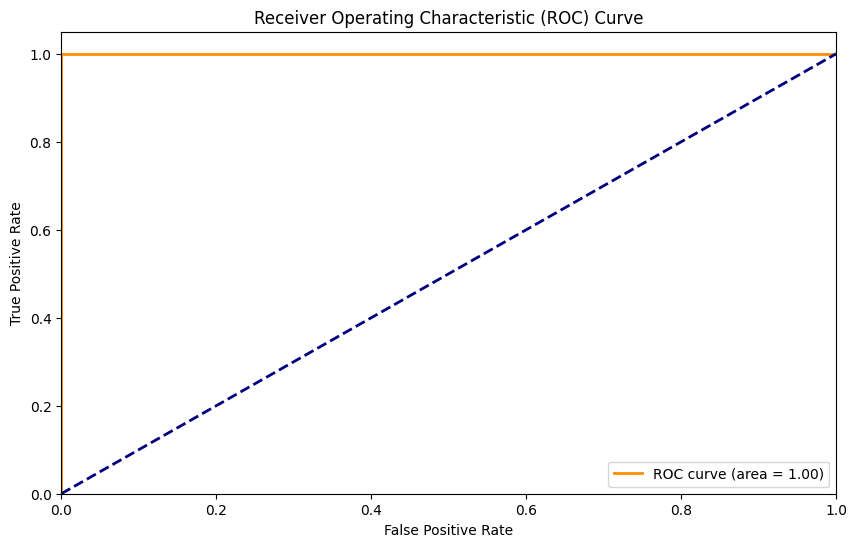

In [7]:
# Создание и обучение наивного байесовского классификатора
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Предсказание вероятностей для тестовой выборки
y_pred_prob = gnb.predict_proba(X_test)[:, 1]

# Расчет ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc}')

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


ROC AUC: 0.9885110294117647


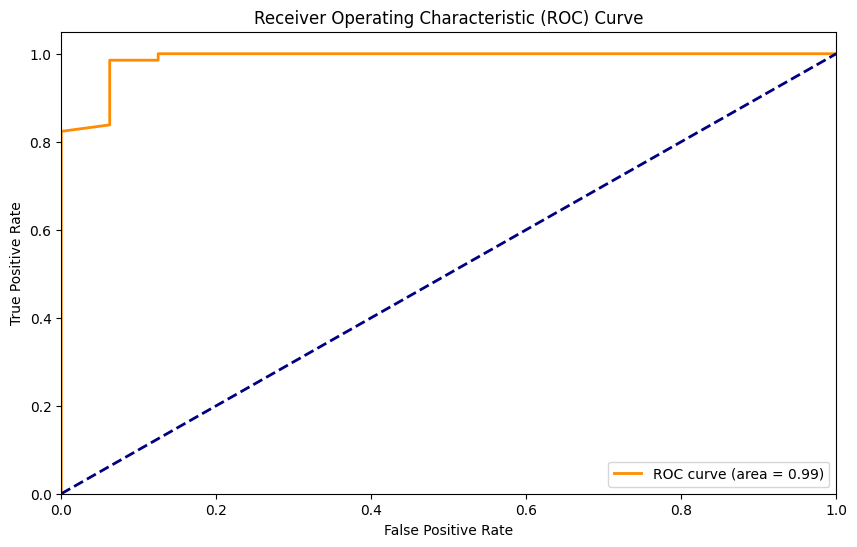

In [8]:
# Выбор двух признаков для классификации
X_new = X[:, [0, 1]]  # sepal_length (индекс 0) и sepal_width (индекс 1)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Создание и обучение наивного байесовского классификатора
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Предсказание вероятностей для тестовой выборки
y_pred_prob = gnb.predict_proba(X_test)[:, 1]

# Расчет ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc}')

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


ROC AUC: 0.9963235294117647


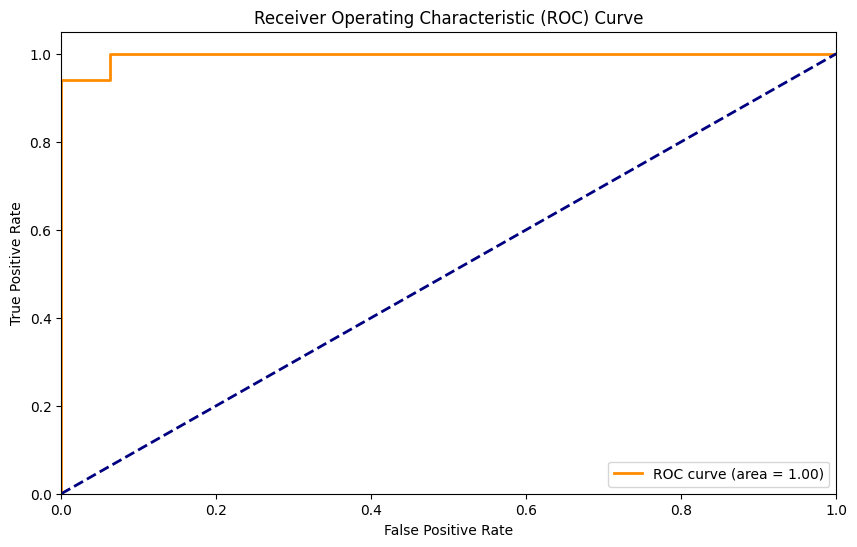

In [9]:
# Применение PCA для снижения размерности до 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Создание и обучение наивного байесовского классификатора
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Предсказание вероятностей для тестовой выборки
y_pred_prob = gnb.predict_proba(X_test)[:, 1]

# Расчет ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc}')

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
